In [1]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip


zip_ref=zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2023-04-26 21:06:44--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.200.128, 74.125.68.128, 74.125.24.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.200.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  23.9MB/s    in 5.4s    

2023-04-26 21:06:49 (19.2 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [3]:
!ls pizza_steak/train/pizza

1008104.jpg  1638227.jpg  2235981.jpg  2774899.jpg  3464027.jpg  576236.jpg
1008144.jpg  1646974.jpg  2236914.jpg  2775763.jpg  3464858.jpg  5764.jpg
1008844.jpg  1649108.jpg  2241448.jpg  2778214.jpg  3473991.jpg  579691.jpg
1008941.jpg  1649276.jpg  2247711.jpg  277963.jpg   3475936.jpg  593400.jpg
1011404.jpg  1652943.jpg  2253670.jpg  2785084.jpg  3478964.jpg  59445.jpg
102037.jpg   1654444.jpg  2255361.jpg  2793535.jpg  3479875.jpg  596494.jpg
1026922.jpg  1660415.jpg  2274117.jpg  27963.jpg    3479936.jpg  598381.jpg
1029698.jpg  1663749.jpg  2279642.jpg  2800325.jpg  3484590.jpg  604977.jpg
1033251.jpg  1665654.jpg  2280345.jpg  2811032.jpg  3493457.jpg  608085.jpg
1035854.jpg  166823.jpg   2285269.jpg  282013.jpg   349946.jpg	 618021.jpg
1038357.jpg  1670471.jpg  2285942.jpg  2821034.jpg  350358.jpg	 61822.jpg
1040878.jpg  1671531.jpg  228778.jpg   2821048.jpg  3505182.jpg  618348.jpg
1044524.jpg  1678284.jpg  2291093.jpg  2827938.jpg  3512070.jpg  625687.jpg
1044789.jpg  16810

In [4]:
import os
len(os.listdir("pizza_steak/train/pizza"))

750

In [66]:
import pathlib
import numpy as np
data_dir=pathlib.Path("pizza_steak/train")
class_names=np.array(sorted([item.name for item in data_dir.glob("*")]))
print(class_names)

['pizza' 'steak']


In [6]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random



In [7]:
def view_img(target_dir,target_class):
  target_folder=target_dir+target_class
  rand_image=random.sample(os.listdir(target_folder),1)
  print(rand_image)
  img=mpimg.imread(target_folder+"/"+rand_image[0])
  plt.imshow(img)
  print(img.shape)
  return img

['413789.jpg']
(512, 384, 3)


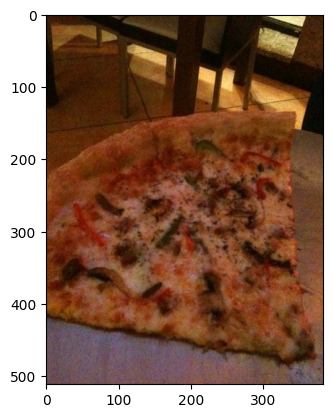

In [8]:
img=view_img("pizza_steak/train","/pizza")

In [9]:
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(512, 384, 3), dtype=uint8, numpy=
array([[[ 51,  20,  18],
        [ 52,  21,  19],
        [ 54,  25,  21],
        ...,
        [ 68,  32,   6],
        [ 69,  34,   6],
        [ 75,  40,  12]],

       [[ 55,  24,  21],
        [ 54,  23,  20],
        [ 53,  24,  20],
        ...,
        [ 68,  34,   7],
        [ 71,  36,   8],
        [ 76,  41,  13]],

       [[ 53,  22,  17],
        [ 52,  21,  16],
        [ 51,  22,  16],
        ...,
        [ 64,  30,   3],
        [ 67,  33,   5],
        [ 71,  37,   9]],

       ...,

       [[103,  71,  84],
        [108,  76,  89],
        [110,  80,  92],
        ...,
        [ 99,  82,  75],
        [108,  91,  84],
        [102,  85,  77]],

       [[105,  74,  89],
        [108,  77,  92],
        [108,  77,  92],
        ...,
        [106,  87,  81],
        [114,  95,  89],
        [118,  99,  92]],

       [[104,  73,  88],
        [106,  75,  90],
        [103,  72,  87],
        ...,
        [109,  90,  8

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [11]:
tf.random.set_seed(42)

# scaling/normailzing data
train_datagen=ImageDataGenerator(1./255)
test_datagen=ImageDataGenerator(1./255)

train_dir="/content/pizza_steak/train"
test_dir="pizza_steak/test"

train_data=train_datagen.flow_from_directory(directory=train_dir,
                                             batch_size=32,
                                             target_size=(244,244),
                                             class_mode="binary",
                                             seed=42)    

test_data=test_datagen.flow_from_directory(directory=test_dir,
                                             batch_size=32,
                                             target_size=(244,244),
                                             class_mode="binary",
                                             seed=42)  

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [12]:
from keras.layers.reshaping.flatten import Flatten
model_1=tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation="relu",
                           input_shape=(244,244,3)        
    ),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding="valid"),
    
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
     tf.keras.layers.MaxPool2D(pool_size=2,
                              padding="valid"),
     tf.keras.layers.Flatten(),
     tf.keras.layers.Dense(1,activation="sigmoid")

])

model_1.compile(optimizer="adam",
                loss="binary_crossentropy",
                metrics=["accuracy"])

history=model_1.fit(train_data,
          epochs=5,
          steps_per_epoch=len(train_data),
          validation_data=test_data,
          validation_steps=len(test_data))

/usr/local/lib/python3.9/dist-packages/keras/preprocessing/image.py:1861: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


Epoch 1/5
47/47 [==============================] - 27s 313ms/step - loss: 5.7733 - accuracy: 0.5573 - val_loss: 0.5846 - val_accuracy: 0.7060
Epoch 2/5
47/47 [==============================] - 10s 223ms/step - loss: 0.3720 - accuracy: 0.8400 - val_loss: 0.4645 - val_accuracy: 0.7700
Epoch 3/5
47/47 [==============================] - 11s 240ms/step - loss: 0.1916 - accuracy: 0.9340 - val_loss: 0.5035 - val_accuracy: 0.7980
Epoch 4/5
47/47 [==============================] - 10s 220ms/step - loss: 0.1055 - accuracy: 0.9787 - val_loss: 0.5049 - val_accuracy: 0.8060
Epoch 5/5
47/47 [==============================] - 10s 217ms/step - loss: 0.0478 - accuracy: 0.9953 - val_loss: 0.4940 - val_accuracy: 0.8240


In [13]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 242, 242, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 240, 240, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 120, 120, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 118, 118, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 116, 116, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 58, 58, 10)       0         
 2D)                                                    

In [14]:
model_2=tf.keras.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid"),
    
    
])


model_2.compile(optimizer="adam",
                loss="binary_crossentropy",
                metrics=["accuracy"])

history_2=model_2.fit(train_data,
          epochs=5,
          steps_per_epoch=len(train_data),
          validation_data=test_data,
          validation_steps=len(test_data))


Epoch 1/5
47/47 [==============================] - 11s 191ms/step - loss: 105.1622 - accuracy: 0.5060 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 10s 206ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 10s 209ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 10s 208ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 9s 195ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000


In [15]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, None)              0         
                                                                 
 dense_1 (Dense)             (None, 4)                 714436    
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 714,461
Trainable params: 714,461
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_3.summary()

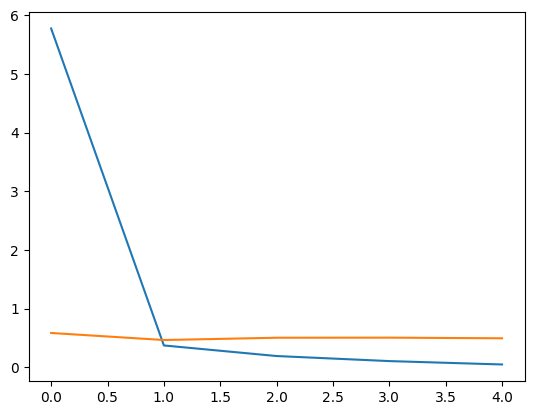

In [17]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

In [18]:
train_datagen_augmented=ImageDataGenerator(rescale=1/255.,
                                           rotation_range=0.2,
                                           shear_range=0.2,
                                           zoom_range=0.2,
                                           width_shift_range=0.2,
                                           height_shift_range=0.3,
                                           horizontal_flip=True)
train_datagen=ImageDataGenerator(rescale=1/255.)
test_datagen=ImageDataGenerator(rescale=1/255.)

In [19]:
train_data_augmented=train_datagen_augmented.flow_from_directory(train_dir,
                                                                 target_size=(224,224),
                                                                 batch_size=32,
                                                                 class_mode="binary",
                                                                 shuffle=False)
train_data=train_datagen.flow_from_directory(train_dir,
                                                                 target_size=(224,224),
                                                                 batch_size=32,
                                                                 class_mode="binary",
                                                                 shuffle=False)


Found 1500 images belonging to 2 classes.
Found 1500 images belonging to 2 classes.


In [20]:
test_data=test_datagen.flow_from_directory(test_dir,
                                                                 target_size=(224,224),
                                                                 batch_size=32,
                                                                 class_mode="binary",
                                                                 shuffle=False)

Found 500 images belonging to 2 classes.


In [21]:
images,labels=train_data.next()
images_aug,labels_aug=train_data_augmented.next()

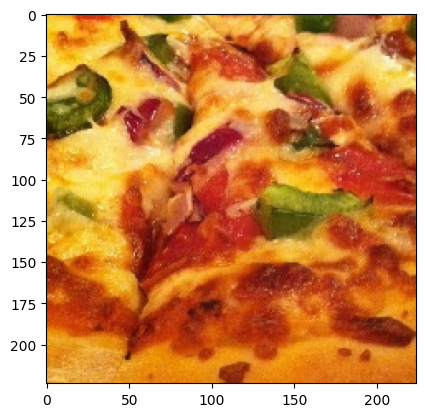

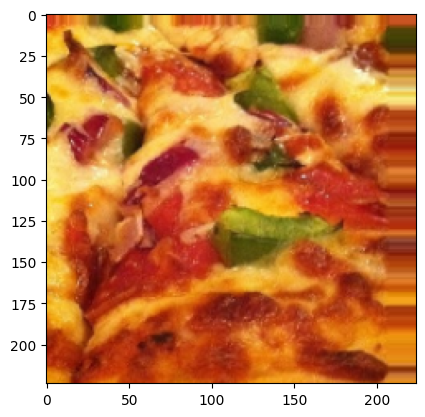

In [22]:
import random
random=random.randint(0,31)
plt.imshow(images[22])
plt.figure()
plt.imshow(images_aug[22])


In [24]:
model_6=tf.keras.Sequential([
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation="sigmoid")


])

In [25]:
model_6.compile(loss="binary_crossentropy",
                optimizer="adam",
                metrics=["accuracy"])

In [26]:
history6=model_6.fit(train_data_augmented,
          epochs=5,
          steps_per_epoch=len(train_data_augmented),
          validation_data=test_data,
          validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 27s 523ms/step - loss: 0.7151 - accuracy: 0.4520 - val_loss: 0.6849 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 24s 512ms/step - loss: 0.6915 - accuracy: 0.4940 - val_loss: 0.6835 - val_accuracy: 0.5200
Epoch 3/5
47/47 [==============================] - 36s 774ms/step - loss: 0.6993 - accuracy: 0.4600 - val_loss: 0.6915 - val_accuracy: 0.5880
Epoch 4/5
47/47 [==============================] - 36s 781ms/step - loss: 0.6921 - accuracy: 0.5160 - val_loss: 0.6863 - val_accuracy: 0.5400
Epoch 5/5
47/47 [==============================] - 25s 539ms/step - loss: 0.7025 - accuracy: 0.5047 - val_loss: 0.6914 - val_accuracy: 0.5740


In [28]:
train_data_aug_shuffled=train_datagen_augmented.flow_from_directory(train_dir,
                                                                 target_size=(224,224),
                                                                 batch_size=32,
                                                                 class_mode="binary",
                                                                 shuffle=True)

Found 1500 images belonging to 2 classes.


In [29]:
model_7=tf.keras.Sequential([
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation="sigmoid")


])
model_7.compile(loss="binary_crossentropy",
                optimizer="adam",
                metrics=["accuracy"])
history7=model_7.fit(train_data_aug_shuffled,
          epochs=5,
          steps_per_epoch=len(train_data_aug_shuffled),
          validation_data=test_data,
          validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 46s 901ms/step - loss: 0.6932 - accuracy: 0.5853 - val_loss: 0.6288 - val_accuracy: 0.6180
Epoch 2/5
47/47 [==============================] - 25s 529ms/step - loss: 0.6016 - accuracy: 0.6853 - val_loss: 0.4436 - val_accuracy: 0.8260
Epoch 3/5
47/47 [==============================] - 25s 528ms/step - loss: 0.5358 - accuracy: 0.7433 - val_loss: 0.3967 - val_accuracy: 0.8420
Epoch 4/5
47/47 [==============================] - 25s 534ms/step - loss: 0.5257 - accuracy: 0.7347 - val_loss: 0.4151 - val_accuracy: 0.8320
Epoch 5/5
47/47 [==============================] - 25s 523ms/step - loss: 0.5011 - accuracy: 0.7647 - val_loss: 0.3719 - val_accuracy: 0.8500


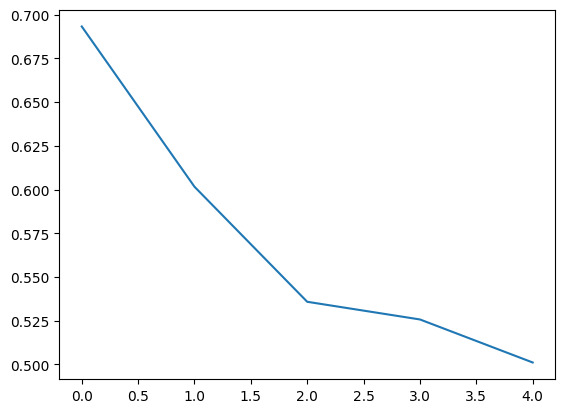

In [32]:
plt.plot(history7.history["loss"])

In [43]:
# Trying model on my image 

pizza=mpimg.imread("IMG-3039.jpg")

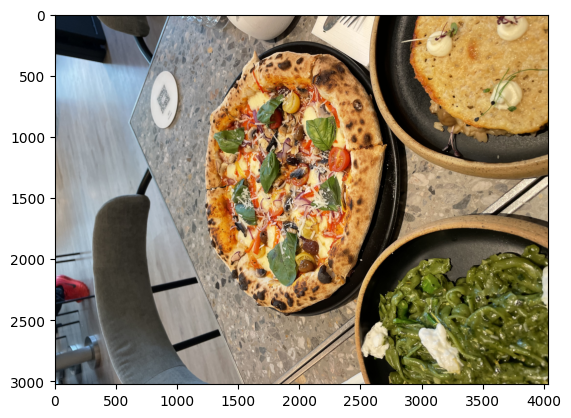

In [35]:
plt.imshow(pizza)

In [36]:
pizza

array([[[ 13,  26,  42],
        [ 16,  29,  45],
        [ 14,  27,  43],
        ...,
        [184, 144,  85],
        [183, 143,  84],
        [184, 144,  85]],

       [[ 20,  33,  49],
        [ 21,  34,  50],
        [ 16,  29,  45],
        ...,
        [185, 145,  86],
        [184, 144,  85],
        [184, 144,  85]],

       [[ 21,  34,  50],
        [ 21,  34,  50],
        [ 15,  28,  44],
        ...,
        [186, 146,  87],
        [185, 145,  86],
        [184, 144,  85]],

       ...,

       [[100, 122, 146],
        [104, 128, 152],
        [111, 137, 160],
        ...,
        [167, 159,  86],
        [165, 157,  84],
        [163, 155,  82]],

       [[ 82, 104, 128],
        [ 87, 111, 135],
        [115, 139, 163],
        ...,
        [165, 157,  84],
        [164, 156,  83],
        [164, 156,  83]],

       [[ 85, 107, 131],
        [ 91, 113, 137],
        [110, 134, 158],
        ...,
        [164, 156,  83],
        [164, 156,  83],
        [164, 156,  83]]

In [39]:
expanded_pizza=tf.expand_dims(pizza,axis=0)

In [40]:
# we need to preprocess image in the format model was trained on

In [45]:
def load_and_prep(filename,imshape=224):
  img=tf.io.read_file(filename)
  img=tf.io.decode_image(img)
  img=tf.image.resize(img,size=[imshape,imshape])
  img=img/255.
  return img

In [59]:
pizza=load_and_prep("pizza.jpeg")
pizza

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.5482793 , 0.64295715, 0.72649056],
        [0.52769107, 0.6208683 , 0.6977691 ],
        [0.522589  , 0.6020108 , 0.6708083 ],
        ...,
        [0.0652761 , 0.1280212 , 0.17900158],
        [0.06307524, 0.12932172, 0.16979797],
        [0.0627451 , 0.12941177, 0.16862746]],

       [[0.5127151 , 0.58246297, 0.6467087 ],
        [0.4451881 , 0.51463586, 0.57341945],
        [0.35080034, 0.41659665, 0.46922773],
        ...,
        [0.0627451 , 0.1254902 , 0.1764706 ],
        [0.0627451 , 0.12899157, 0.16946782],
        [0.0627451 , 0.12941177, 0.16862746]],

       [[0.15651259, 0.2058223 , 0.24011603],
        [0.10201079, 0.15042014, 0.18078229],
        [0.11246497, 0.1517707 , 0.18343335],
        ...,
        [0.0627451 , 0.1254902 , 0.1764706 ],
        [0.0632453 , 0.12874149, 0.16946782],
        [0.06330532, 0.12913164, 0.16862746]],

       ...,

       [[0.49869108, 0.46799874, 0.18213443],
        [0.48

In [63]:
pred=model_7.predict(tf.expand_dims(pizza,axis=0))

1/1 [==============================] - 0s 22ms/step


In [67]:
pred_class=class_names[int(tf.round(pred))]
pred_class

'pizza'

In [71]:
def pred_food(model,filename,class_names=class_names):
  img=load_and_prep(filename)
  pred=model.predict(tf.expand_dims(img,axis=0))
  pred_class=class_names[int(tf.round(pred))]

  plt.imshow(img)
  plt.title(f"prediction:{pred_class}")



In [ ]:
pred_food(model_7,"pizza.jpeg")

# Multiclass classification

In [9]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

zipref=zipfile.ZipFile("10_food_classes_all_data.zip")
zipref.extractall()
zipref.close()

--2023-04-27 12:43:11--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.127.128, 172.217.218.128, 142.251.31.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.127.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  35.1MB/s    in 14s     

2023-04-27 12:43:26 (34.2 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [2]:
ls 10_food_classes_all_data/train

chicken_curry/  fried_rice/      hamburger/  pizza/  steak/
chicken_wings/  grilled_salmon/  ice_cream/  ramen/  sushi/


In [10]:
train_dir="10_food_classes_all_data/train"
test_dir="10_food_classes_all_data/test"


In [31]:
import pathlib
import numpy as np
data_dir=pathlib.Path(train_dir)
class_names=np.array(sorted([item.name for item in data_dir.glob("*")]))
print(class_names)


['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


In [16]:
import random,os
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

def view_img(target_dir,target_class):
  target_folder=target_dir+"/"+ target_class
  rand_image=random.sample(os.listdir(target_folder),1)
  print(rand_image)
  img=mpimg.imread(target_folder+"/"+rand_image[0])
  plt.imshow(img)
  print(img.shape)
  return img


['725951.jpg']
(512, 512, 3)


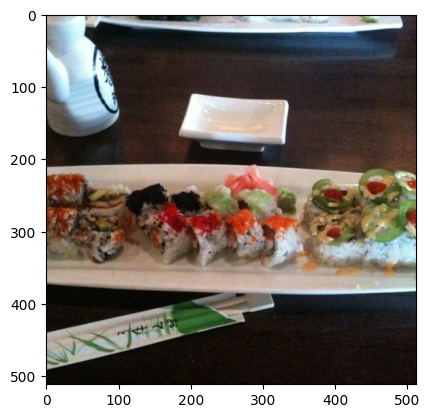

In [18]:
img=view_img(target_dir=train_dir,target_class=random.choice(class_names))

#Preprocessing the data

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# rescale

train_datagen=ImageDataGenerator(rescale=1/255.)
test_datagen=ImageDataGenerator(rescale=1/255.)

train_data=train_datagen.flow_from_directory(train_dir,
                                             target_size=(224,224),
                                             batch_size=32,
                                             class_mode="categorical"
                                             )
                                          
test_data=test_datagen.flow_from_directory(test_dir,
                                             target_size=(224,224),
                                             batch_size=32,
                                             class_mode="categorical"
                                             )

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [24]:
## create a model

import tensorflow as tf
model_8=tf.keras.Sequential([
    tf.keras.layers.Conv2D(10,3,input_shape=(224,224,3),activation="relu"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(padding="valid"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(padding="valid"),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10,activation="softmax")]
)

In [25]:
model_8.compile(loss="categorical_crossentropy",
                optimizer="adam",
                metrics=["accuracy"])

In [27]:

history_8 =model_8.fit(train_data,
                      epochs=5,
                      steps_per_epoch=len(train_data),
                      
                      validation_data=test_data,
                      validation_steps=len(test_data)
            )

Epoch 1/5
235/235 [==============================] - 68s 233ms/step - loss: 2.1126 - accuracy: 0.2337 - val_loss: 1.9317 - val_accuracy: 0.3128
Epoch 2/5
235/235 [==============================] - 51s 218ms/step - loss: 1.8701 - accuracy: 0.3551 - val_loss: 1.8672 - val_accuracy: 0.3556
Epoch 3/5
235/235 [==============================] - 59s 251ms/step - loss: 1.6642 - accuracy: 0.4388 - val_loss: 1.9249 - val_accuracy: 0.3352
Epoch 4/5
235/235 [==============================] - 58s 245ms/step - loss: 1.2974 - accuracy: 0.5609 - val_loss: 2.0942 - val_accuracy: 0.3232
Epoch 5/5
235/235 [==============================] - 50s 214ms/step - loss: 0.8265 - accuracy: 0.7281 - val_loss: 2.8711 - val_accuracy: 0.2792


#Evaluate the model

In [28]:
model_8.evaluate(test_data)

79/79 [==============================] - 13s 162ms/step - loss: 2.8711 - accuracy: 0.2792


[2.8710508346557617, 0.2791999876499176]

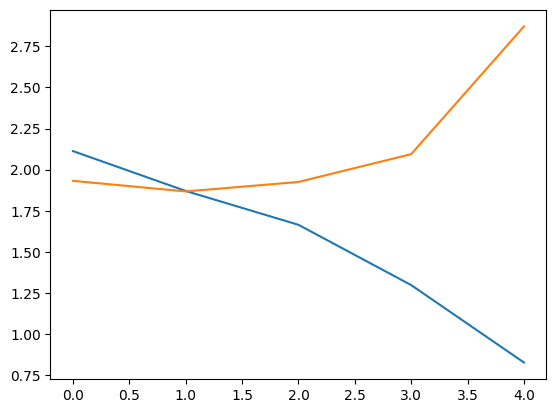

In [30]:
plt.plot(history_8.history["loss"])
plt.plot(history_8.history["val_loss"])

In [1]:
# removing overfitting

import tensorflow as tf
model_9=tf.keras.Sequential([
    tf.keras.layers.Conv2D(10,3,input_shape=(224,224,3),activation="relu"),
 
    tf.keras.layers.MaxPool2D(padding="valid"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
   
    tf.keras.layers.MaxPool2D(padding="valid"),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10,activation="softmax")]
)

In [2]:
model_9.compile(loss="categorical_crossentropy",
                optimizer="adam",
                metrics=["accuracy"])

In [13]:
history_9 =model_9.fit(train_data,
                      epochs=5,
                      steps_per_epoch=len(train_data),
                      
                      validation_data=test_data,
                      validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 67s 244ms/step - loss: 2.1737 - accuracy: 0.2313 - val_loss: 2.0018 - val_accuracy: 0.2712
Epoch 2/5
235/235 [==============================] - 61s 262ms/step - loss: 1.8775 - accuracy: 0.3507 - val_loss: 1.9529 - val_accuracy: 0.2920
Epoch 3/5
235/235 [==============================] - 68s 291ms/step - loss: 1.6678 - accuracy: 0.4285 - val_loss: 1.9666 - val_accuracy: 0.2968
Epoch 4/5
235/235 [==============================] - 68s 288ms/step - loss: 1.3538 - accuracy: 0.5444 - val_loss: 2.0964 - val_accuracy: 0.2752
Epoch 5/5
235/235 [==============================] - 76s 325ms/step - loss: 0.9811 - accuracy: 0.6916 - val_loss: 2.2699 - val_accuracy: 0.2988


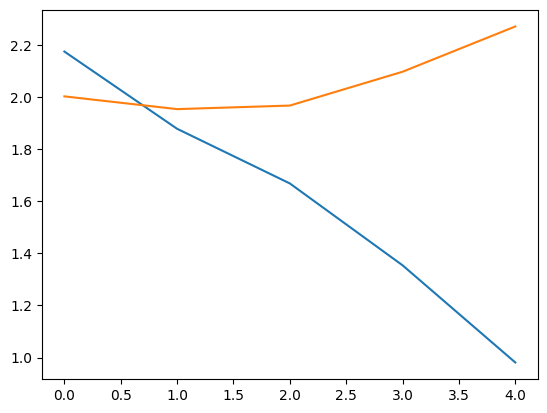

In [16]:
import matplotlib.pyplot as plt
plt.plot(history_9.history["loss"])
plt.plot(history_9.history["val_loss"])

In [17]:
model_9.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 10)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 29160)             0         
                                                                 
 dense (Dense)               (None, 10)                2

In [19]:
# trying data augmentation

train_datagen_aug=ImageDataGenerator(rescale=1/255.,
                                     rotation_range=0.2,
                                     width_shift_range=0.2,
                                     height_shift_range=0.2,
                                     horizontal_flip=True)

train_data_aug=train_datagen_aug.flow_from_directory(train_dir,
                                                     target_size=(224,224),
                                                     batch_size=32,
                                                     class_mode="categorical")


Found 7500 images belonging to 10 classes.


In [21]:
model_10=tf.keras.Sequential([
    tf.keras.layers.Conv2D(10,3,input_shape=(224,224,3),activation="relu"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
      tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(padding="valid"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(padding="valid"),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10,activation="softmax")]
)
model_10.compile(loss="categorical_crossentropy",
                optimizer="adam",
                metrics=["accuracy"])
history_10 =model_10.fit(train_data,
                      epochs=5,
                      steps_per_epoch=len(train_data),
                      
                      validation_data=test_data,
                      validation_steps=len(test_data)
            )

Epoch 1/5
235/235 [==============================] - 56s 223ms/step - loss: 2.2223 - accuracy: 0.1655 - val_loss: 2.0676 - val_accuracy: 0.2460
Epoch 2/5
235/235 [==============================] - 52s 219ms/step - loss: 1.8898 - accuracy: 0.3448 - val_loss: 1.9336 - val_accuracy: 0.3184
Epoch 3/5
235/235 [==============================] - 50s 213ms/step - loss: 1.3855 - accuracy: 0.5312 - val_loss: 2.0777 - val_accuracy: 0.2988
Epoch 4/5
235/235 [==============================] - 59s 252ms/step - loss: 0.6996 - accuracy: 0.7707 - val_loss: 2.8087 - val_accuracy: 0.2728
Epoch 5/5
235/235 [==============================] - 51s 218ms/step - loss: 0.2254 - accuracy: 0.9311 - val_loss: 4.8208 - val_accuracy: 0.2416


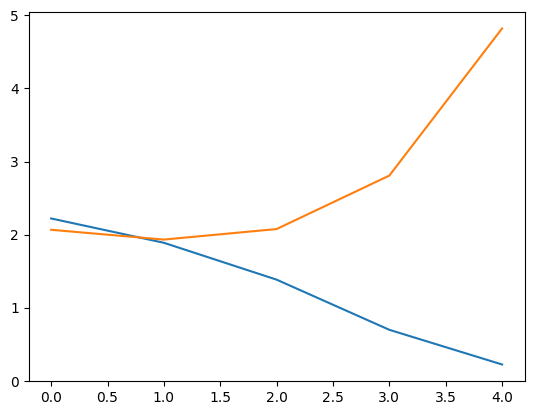

In [22]:
plt.plot(history_10.history["loss"])
plt.plot(history_10.history["val_loss"])

In [24]:
# making prediction on our image

In [25]:
icecream="SNAP-20220825-130934.jpg"

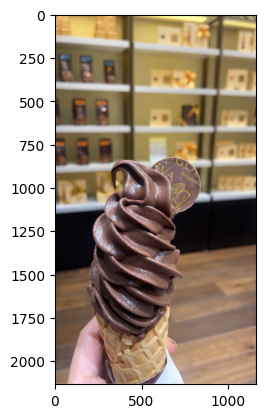

In [28]:
import matplotlib.image as mpimg
icecream=mpimg.imread("SNAP-20220825-130934.jpg")
plt.imshow(icecream)

In [29]:
def load_and_prep(filename,imshape=224):
  img=tf.io.read_file(filename)
  img=tf.io.decode_image(img)
  img=tf.image.resize(img,size=[imshape,imshape])
  img=img/255.
  return img

In [35]:
def pred_food(model,filename,class_names=class_names):
  img=load_and_prep(filename)
  pred=model.predict(tf.expand_dims(img,axis=0))

  if len(pred[0])>1:
    pred_class=class_names[tf.argmax(pred[0])]
  else:
    pred_class=class_names[int(tf.round(pred[0]))]

  plt.imshow(img)
  plt.title(f"prediction:{pred_class}")



1/1 [==============================] - 0s 20ms/step


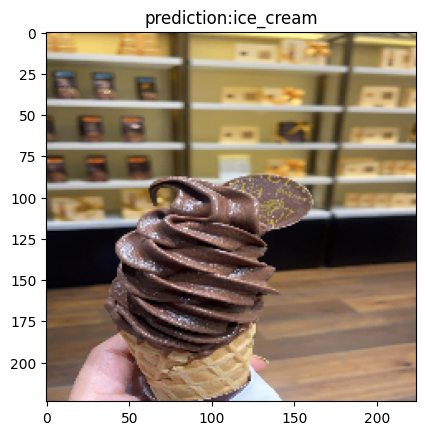

In [36]:
pred_food(model=model_10,
          filename="SNAP-20220825-130934.jpg",
          class_names=class_names)
